# Tarea 2 Redes Neuronales Artificiales
Andrea Figueroa

Alejandro Sazo

In [ ]:
from keras.datasets import mnist
import numpy as np

def f(nval=1000):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_val = x_train[-nval:]
    y_val = y_train[-nval:]
    x_train = x_train[:-nval]
    y_train = y_train[:-nval]
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_val = np_utils.to_categorical(y_val, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    return (x_train, Y_train), (x_test, Y_test), (x_val, Y_val)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt


# Obtener conjuntos de datos

train, test, val = f()
x_train, Y_train = train
x_test, Y_test = test
x_val, Y_val = val

# Iterar sobre nuevas dimensionalidades
d_prime = [2, 8, 32, 64]

for d in d_prime:
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_768x'+str(d)+'.h5')

    
#save other stuff ...

In [1]:
from keras.models import load_model
autoencoder = load_model('basic_autoencoder_768x32.h5')
#load other stuff ...
encoded_test = encoder.predict(x_test)
decoded_test = decoder.predict(encoded_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28))
    plt.gray()

Using TensorFlow backend.


NameError: name 'encoder' is not defined

Pregunta 3

In [41]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Parte a)

Tamaño imágenes:  32 x 32
Número de clases: 10
Número de ejemplos de test: 26032
Número de ejemplos de entrenamiento: 73257
Set de Test:


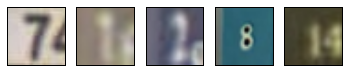

Set de Entrenamiento:


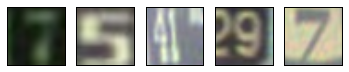

In [123]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# Cargar set de entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] - 1

# Cargar set de test
X_test = test_data['X'].T
y_test = test_data['y'] - 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Número de clases
n_classes = len(np.unique(y_train))

# Número de ejemplos
n_train = len(X_train)
n_test = len(X_test)

print "Tamaño imágenes: " , np.shape(X_train[0])[1], "x", np.shape(X_train[0])[2]
print "Número de clases:" , n_classes
print "Número de ejemplos de test:" , n_test
print "Número de ejemplos de entrenamiento:" , n_train

# Número de imágenes a mostrar
n_im = 5

print "Set de Test:"

# Se eligen n elementos al azar
index = random.sample(X_test, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(1, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
plt.show()
    
print "Set de Entrenamiento:"

# Se eligen n elementos al azar
index = random.sample(X_train, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(2, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
        
plt.show()